## 1) Import Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## 2) Import the data

In [4]:
cars =  pd.read_csv("Car_sales.csv")
cars.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [6]:
cars.shape

(157, 16)

## 3) Exploratory Data Analysis

### 3.1) Data Types, Missing Data, Summary statistics

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [8]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [9]:
cars["Manufacturer"] = cars["Manufacturer"].astype("category")
cars["Model"] = cars["Model"].astype("category")
cars["Vehicle_type"] = cars["Vehicle_type"].astype("category")

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

In [11]:
cars.isnull().sum().sort_values(ascending=False)

__year_resale_value    36
Fuel_efficiency         3
Price_in_thousands      2
Curb_weight             2
Power_perf_factor       2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Fuel_capacity           1
Manufacturer            0
Model                   0
Sales_in_thousands      0
Vehicle_type            0
Latest_Launch           0
dtype: int64

**above you see that we have __year_resale_value,Fuel_efficiency,Price_in_thousands,Curb_weight,Power_perf_factor,Engine_size,
Horsepower,Wheelbase,Width,Length,Fuel_capacity**

In [12]:
cars.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### 3.2)Feature Analysis

***two Types of feature analysis***<br>
1) Categorical Features<br> 
2) Numarical Features

In [13]:
manufacturer_counts = cars["Manufacturer"].value_counts(dropna=False)
manufacturer_counts

Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Nissan         7
Chrysler       7
Mitsubishi     7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

Text(0, 0.5, 'Manufacturer')

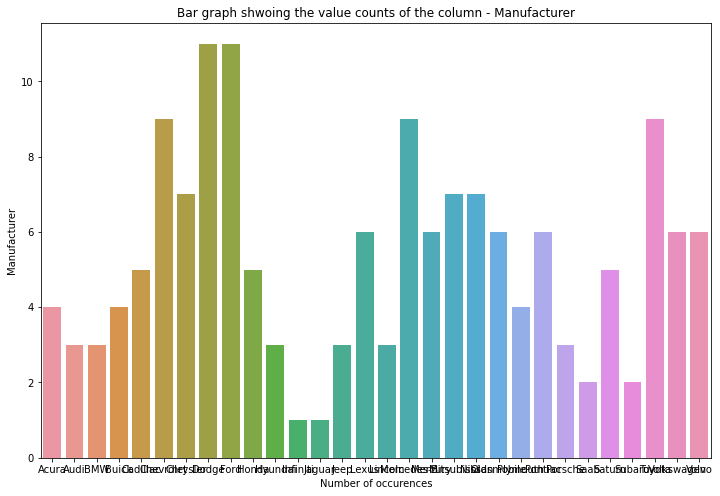

In [14]:
fig = plt.figure(figsize=(12,8))
sns.barplot(manufacturer_counts.index, manufacturer_counts.values)
plt.title("Bar graph shwoing the value counts of the column - Manufacturer")
plt.xlabel("Number of occurences")
plt.ylabel("Manufacturer")

In [15]:
mean_price_manufacturer = cars[["Manufacturer","Price_in_thousands"]].groupby("Manufacturer",as_index=False).mean()
mean_price_manufacturer

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,39.980000
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,40.254000
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,24.213636
8,Ford,21.047273
9,Honda,20.277000


Text(0, 0.5, 'Mean Price')

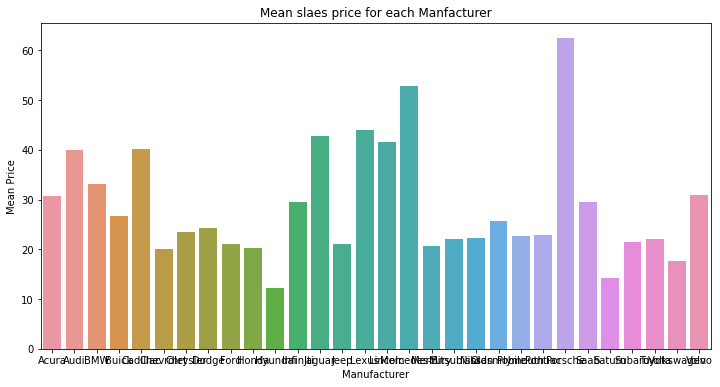

In [16]:
fig = plt.figure(figsize=(12,6))
sns.barplot(mean_price_manufacturer["Manufacturer"],mean_price_manufacturer["Price_in_thousands"])
plt.title("Mean slaes price for each Manfacturer")
plt.ylabel("Mean Price")

Text(0.5, 1.0, 'Distribution of the column-Price in Thousands')

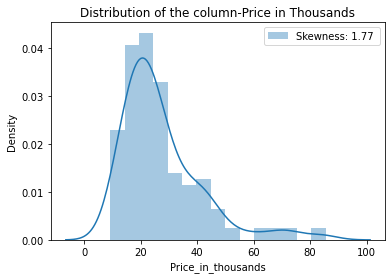

In [17]:
sns.distplot(cars["Price_in_thousands"],label="Skewness: %.2f "%(cars["Price_in_thousands"].skew()))
plt.legend(loc="best")
plt.title("Distribution of the column-Price in Thousands")

Text(0.5, 1.0, 'Distribution column: Sales in thousands')

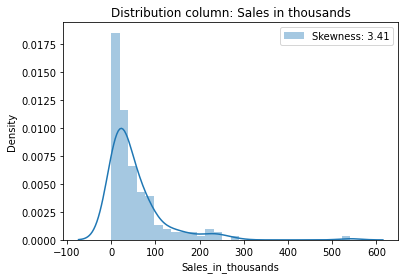

In [18]:
sns.distplot(cars["Sales_in_thousands"], label="Skewness: %.2f"%(cars["Sales_in_thousands"].skew()))
plt.legend(loc="best")
plt.title("Distribution column: Sales in thousands")

Text(0.5, 1.0, 'Distribution column- Year Resale Value')

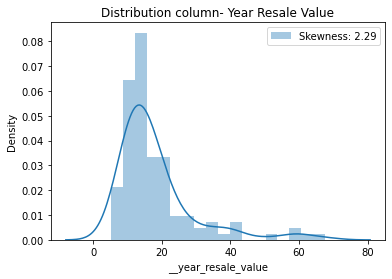

In [19]:
sns.distplot(cars["__year_resale_value"],label="Skewness: %.2f"%(cars["__year_resale_value"].skew())) 
plt.legend(loc="best")
plt.title("Distribution column- Year Resale Value" )

Text(0.5, 1.0, 'Distribution column- Engine size')

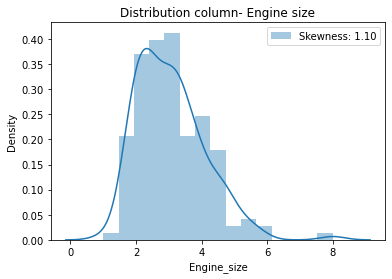

In [20]:
sns.distplot(cars["Engine_size"],label="Skewness: %.2f"%(cars["Engine_size"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Engine size")

Text(0.5, 1.0, 'Distribution column- Horsepower')

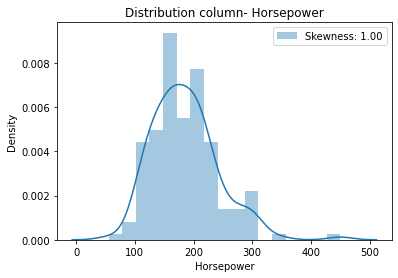

In [21]:
sns.distplot(cars["Horsepower"],label="Skewness: %.2f"%(cars["Horsepower"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Horsepower")

Text(0.5, 1.0, 'Distribution column- Wheelbase')

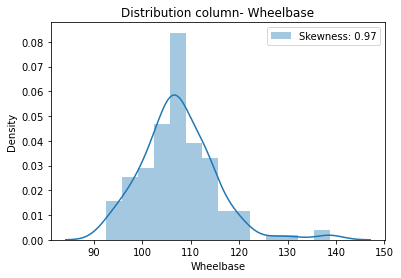

In [22]:
sns.distplot(cars["Wheelbase"],label="Skewness: %.2f"%(cars["Wheelbase"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Wheelbase")

Text(0.5, 1.0, 'Distribution column- Width')

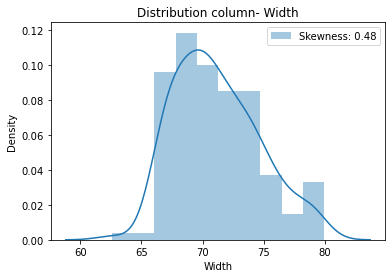

In [23]:
sns.distplot(cars["Width"],label="Skewness: %.2f"%(cars["Width"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Width")

Text(0.5, 1.0, 'Distribution column- Length')

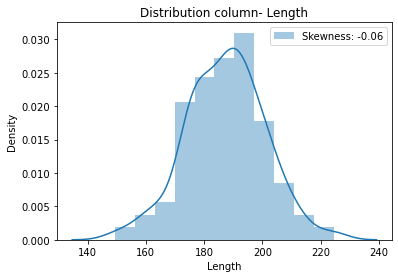

In [24]:
sns.distplot(cars["Length"],label="Skewness: %.2f"%(cars["Length"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Length")

Text(0.5, 1.0, 'Distribution column- Curb_weight')

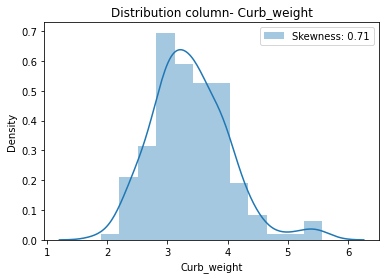

In [25]:
sns.distplot(cars["Curb_weight"],label="Skewness: %.2f"%(cars["Curb_weight"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Curb_weight")

Text(0.5, 1.0, 'Distribution column- Fuel_capacity')

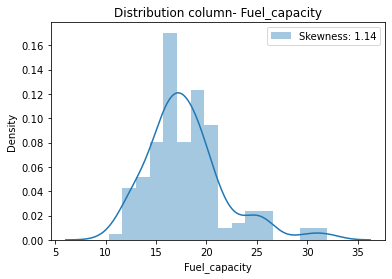

In [26]:
sns.distplot(cars["Fuel_capacity"],label="Skewness: %.2f"%(cars["Fuel_capacity"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Fuel_capacity")

Text(0.5, 1.0, 'Distribution column- Fuel_efficiency')

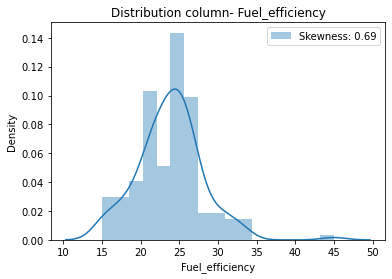

In [27]:
sns.distplot(cars["Fuel_efficiency"],label="Skewness: %.2f"%(cars["Fuel_efficiency"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Fuel_efficiency")

Text(0.5, 1.0, 'Distribution column- Power_perf_factor')

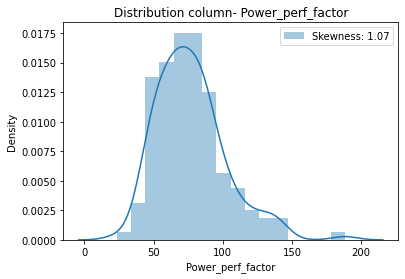

In [28]:
sns.distplot(cars["Power_perf_factor"],label="Skewness: %.2f"%(cars["Power_perf_factor"].skew()))
plt.legend(loc="best")
plt.title("Distribution column- Power_perf_factor")

In [29]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

## 4) Data Preprocessing

### Detect and remove outliers

<AxesSubplot:>

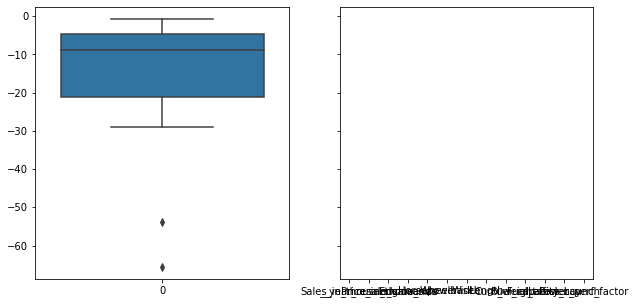

In [30]:
#Detect Outlier
car_df = cars[['Sales_in_thousands', '__year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity','Fuel_efficiency','Power_perf_factor']]
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q1-Q3

#remove Outlier

cars_out = cars[~((car_df < (Q1 - 1.5 * IQR)) |(car_df > (Q3 + 1.5 * IQR)))]
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.boxplot(ax=axes[0], data=IQR)
sns.boxplot(ax=axes[1],data=cars_out)


*** Here We see that there is no outlier in this dataset ***

### Drop and Fill Missing values

In [31]:
##lets see how many missing data values in the data set first we modify the data

cars_modified =  cars[cars["Price_in_thousands"].notna()]
cars_modified.head()
# cars_modified.isnull().sum()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


In [32]:
cars_modified.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             0
Horsepower              0
Wheelbase               0
Width                   0
Length                  0
Curb_weight             1
Fuel_capacity           0
Fuel_efficiency         2
Latest_Launch           0
Power_perf_factor       0
dtype: int64

In [33]:
cars_modified["__year_resale_value"] = cars_modified["__year_resale_value"].fillna(cars_modified["__year_resale_value"].median())

In [36]:
cars_modified["Curb_weight"] = cars_modified["Curb_weight"].fillna(cars_modified["Curb_weight"].median())
cars_modified["Fuel_efficiency"] = cars_modified["Fuel_efficiency"].fillna(cars_modified["Fuel_efficiency"].mean())

In [37]:
cars_modified.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [39]:
#now remove unneccesary Columns from the dataset

cars_modified.drop("Model",axis=1,inplace=True)

In [40]:
cars_modified.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
